Downloading: "https://fypphotos.s3.amazonaws.com/resnet_model_final_presentation.pth" to /root/.cache/torch/hub/checkpoints/resnet_model_final_presentation.pth
100%|██████████| 90.0M/90.0M [00:01<00:00, 48.3MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Saving Screenshot 2023-09-21 at 12.16.11 AM.png to Screenshot 2023-09-21 at 12.16.11 AM.png
User uploaded file "Screenshot 2023-09-21 at 12.16.11 AM.png" with length 780355 bytes


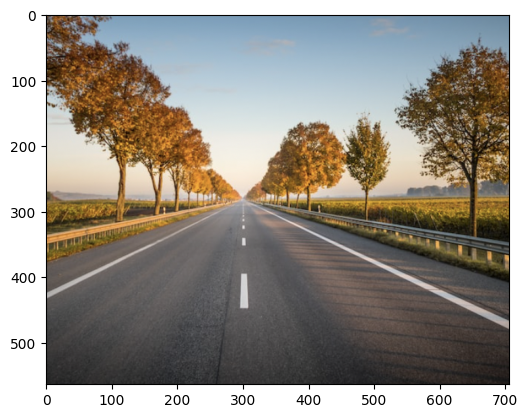

The image is not scenic.


In [1]:
import torch
from torchvision.models import resnet50
from torchvision import transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

MODEL_URL = 'https://fypphotos.s3.amazonaws.com/resnet_model_final_presentation.pth'

# Load the model directly from the URL
model_weights = torch.hub.load_state_dict_from_url(MODEL_URL, map_location='cpu')

# Define the model architecture
fyp_model = resnet50(pretrained=False)
fyp_model.fc = torch.nn.Linear(2048, 2)  # Adjust the output layer

# Load the weights into the model
fyp_model.load_state_dict(model_weights)
fyp_model = fyp_model.to(device)




from PIL import Image  # Import the Image class
from torchvision import transforms
import matplotlib.pyplot as plt
from google.colab import files
import io

import pandas as pd

transform = transforms.Compose([
    transforms.Lambda(lambda image: image.convert('RGB')),  # convert to RGB
    transforms.Resize((224, 224)),  # ResNet requires 224x224 images
    transforms.ToTensor(),
])


def predict_scenic(model, device, transform):
    # Create upload file field
    uploaded = files.upload()

    # Load and preprocess the uploaded image
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

        # Load the image and convert it to RGB
        image = Image.open(io.BytesIO(uploaded[fn])).convert('RGB')
        # Show the uploaded image
        plt.imshow(image)
        plt.show()
        # Apply the same transformations as during training
        image = transform(image)

        # Add an extra dimension for batch (ResNet expects a batch)
        image = image.unsqueeze(0)

        # Ensure the model is in evaluation mode
        model.eval()

        # Move the image to the device used during training (CPU or GPU)
        image = image.to(device)

        # Make the prediction
        output = model(image)

        # Convert output probabilities to predicted class (0 or 1)
        _, preds = torch.max(output, 1)

        # Output the prediction
        if preds.item() == 1:
            return 'The image is scenic.'
        else:
            return 'The image is not scenic.'

# Use the function
print(predict_scenic(fyp_model, device, transform))


